In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [15]:
import os
print("Current Working Directory:", os.getcwd())
current_directory = os.getcwd()
train_path = os.path.join(current_directory, "dataset","Train")
valid_path = os.path.join(current_directory, "dataset","Valid")
test_path = os.path.join(current_directory, "dataset","Test")

Current Working Directory: c:\Users\Dell\Downloads\potato


In [19]:
# function is used to create an image dataset from a directory structure where images are organized into subdirectories representing class labels
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 900 files belonging to 3 classes.


In [20]:
# Get the class labels
labels = training_set.class_names
print(labels)


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [21]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [22]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [23]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │    13,825,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,002,259 (57.23 MB)

 Trainable params: 15,002,259 (57.23 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 800ms/step - accuracy: 0.3907 - loss: 4.9533 - val_accuracy: 0.6433 - val_loss: 0.7864
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 795ms/step - accuracy: 0.6901 - loss: 0.7180 - val_accuracy: 0.7667 - val_loss: 0.4964
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 980ms/step - accuracy: 0.7838 - loss: 0.4944 - val_accuracy: 0.8000 - val_loss: 0.4145
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 815ms/step - accuracy: 0.8618 - loss: 0.3161 - val_accuracy: 0.8267 - val_loss: 0.4702
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 786ms/step - accuracy: 0.9072 - loss: 0.2524 - val_accuracy: 0.8967 - val_loss: 0.2617
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 789ms/step - accuracy: 0.9260 - loss: 0.1833 - val_accuracy: 0.9033 - val_loss: 0.2252
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 788ms/step - accuracy: 0.9669 - loss: 0.1061 - val_accuracy: 0.9200 - val_loss: 0.1751
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 803ms/step - accuracy: 0.9762 - loss: 0.0739 - val_accu

In [27]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.9957 - loss: 0.0271
Training accuracy: 0.996666669845581


In [28]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - accuracy: 0.9074 - loss: 0.2194
Validation accuracy: 0.9233333468437195


In [29]:
cnn.save('trained_plant_disease_model.keras')

In [30]:
training_history.history

{'accuracy': [0.43888887763023376,
  0.7133333086967468,
  0.8033333420753479,
  0.8788889050483704,
  0.9177777767181396,
  0.9355555772781372,
  0.9711111187934875,
  0.9722222089767456,
  0.9511111378669739,
  0.9855555295944214],
 'loss': [2.645167112350464,
  0.6617451310157776,
  0.46233198046684265,
  0.29772523045539856,
  0.21632668375968933,
  0.16127508878707886,
  0.09547393769025803,
  0.08394923061132431,
  0.1409980058670044,
  0.05197156220674515],
 'val_accuracy': [0.6433333158493042,
  0.7666666507720947,
  0.800000011920929,
  0.8266666531562805,
  0.8966666460037231,
  0.903333306312561,
  0.9200000166893005,
  0.8299999833106995,
  0.9233333468437195,
  0.9233333468437195],
 'val_loss': [0.7863832116127014,
  0.496444433927536,
  0.4145151972770691,
  0.47017329931259155,
  0.2617014944553375,
  0.2251974493265152,
  0.17507296800613403,
  0.5255061984062195,
  0.2542847990989685,
  0.19041261076927185]}

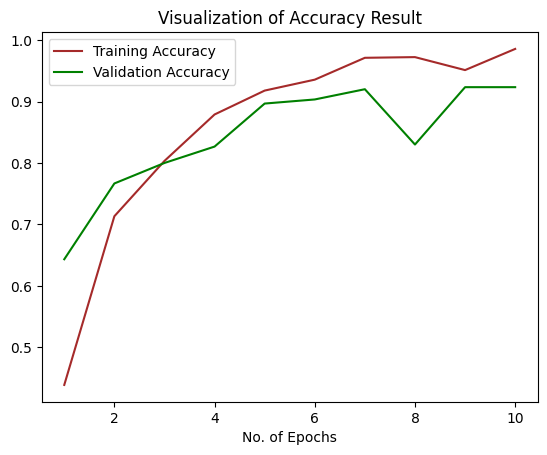

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()